## QuasarNET Performance vs nepochs
#### Plot to show performance of QuasarNET as a function of the number of epochs of training
xxx

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
  
import astropy
import copy
import glob
import numpy as np
from matplotlib import pyplot as plt

from quasarnet.io import read_truth
from qn_analysis import plot, strategy, utils, variables

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
figsize = (12,12)
fontsize = 18

plt.rc('font', size=fontsize)

### Load the histories from the different QN models

In [3]:
data = {}

t_data = {}
for p in variables.NEPOCH_COADD_PROP_TRAINSIZES:

    ## Load the QN using nchunks value.
    fi_qn = glob.glob(variables.OUTDIR+'/qn_models/additional_setups/nepochs/coadd/prop_{}/*hist*.fits'.format(p))
    print(fi_qn)
    
    if len(fi_qn)>0:
        t_data['QN_{}'.format(p)] = astropy.io.fits.open(fi_qn[0])
    #data['QN_{}'.format(p)] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

    data['coadd'] = t_data
    
t_data = {}
for p in variables.NEPOCH_BESTEXP_PROP_TRAINSIZES:

    ## Load the QN using nchunks value.
    fi_qn = glob.glob(variables.OUTDIR+'/qn_models/additional_setups/nepochs/bestexp/prop_{}/*hist*.fits'.format(p))
    print(fi_qn)
    
    if len(fi_qn)>0:
        t_data['QN_{}'.format(p)] = astropy.io.fits.open(fi_qn[0])
    #data['QN_{}'.format(p)] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)
    
    data['bestexp'] = t_data
    
t_data = {}
for p in variables.NEPOCH_RANDEXP_PROP_TRAINSIZES:

    ## Load the QN using nchunks value.
    fi_qn = glob.glob(variables.OUTDIR+'/qn_models/additional_setups/nepochs/randexp/prop_{}/*hist*.fits'.format(p))
    print(fi_qn)
    
    if len(fi_qn)>0:
        t_data['QN_{}'.format(p)] = astropy.io.fits.open(fi_qn[0])
    #data['QN_{}'.format(p)] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)
    
    data['randexp'] = t_data

['/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper//qn_models/additional_setups/nepochs/coadd/prop_0.9/qn_train_coadd_indtest_0_0_hist.fits']
['/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper//qn_models/additional_setups/nepochs/coadd/prop_0.5/qn_train_coadd_indtest_0_0_hist.fits']
['/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper//qn_models/additional_setups/nepochs/coadd/prop_0.2/qn_train_coadd_indtrain_0_0_hist.fits']
['/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper//qn_models/additional_setups/nepochs/coadd/prop_0.1/qn_train_coadd_indtrain_0_0_hist.fits']
['/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper//qn_models/additional_setups/nepochs/coadd/prop_0.05/qn_train_coadd_indtrain_0_0_hist.fits']
['/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper//qn_models/additional_setups/nepochs/coadd/prop_0.025/qn_train_coadd_indtrain_0_0_hist.fits']
['/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper//qn_models/additional_setups/nepoc

### Look at loss with number of epochs

coadd
QN_0.9  : @200 0.00160, @500 0.00065
QN_0.5  : @200 0.00068, @500 0.00033
QN_0.2  : @200 0.00032, @500 0.00017
QN_0.1  : @200 0.00039, @500 0.00019
QN_0.05 : @200 0.00053, @500 0.00024
QN_0.025: @200 0.00091, @500 0.00036
QN_0.01 : @200 0.00216, @500 0.00076


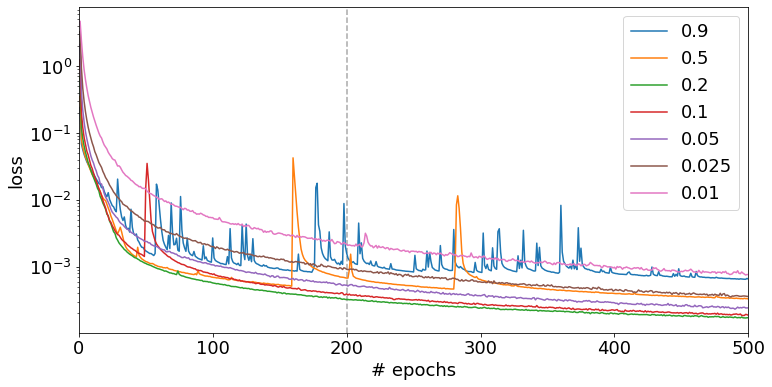

bestexp
QN_0.2  : @200 0.00054, @500 0.00030
QN_0.1  : @200 0.00042, @500 0.00021
QN_0.05 : @200 0.00056, @500 0.00026


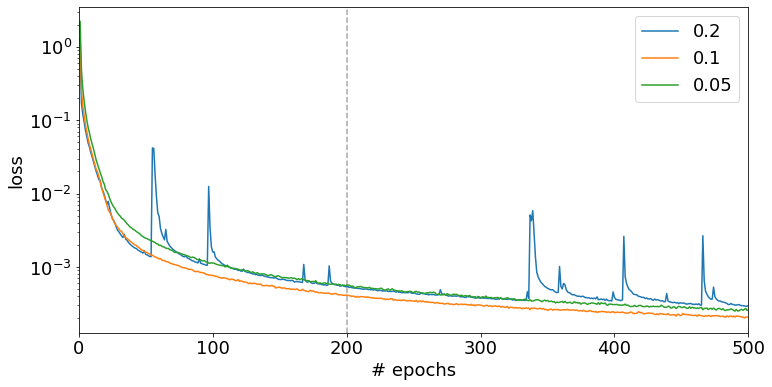

randexp
QN_0.2  : @200 0.00046, @500 0.00025
QN_0.1  : @200 0.00046, @500 0.00041
QN_0.05 : @200 0.00070, @500 0.00028


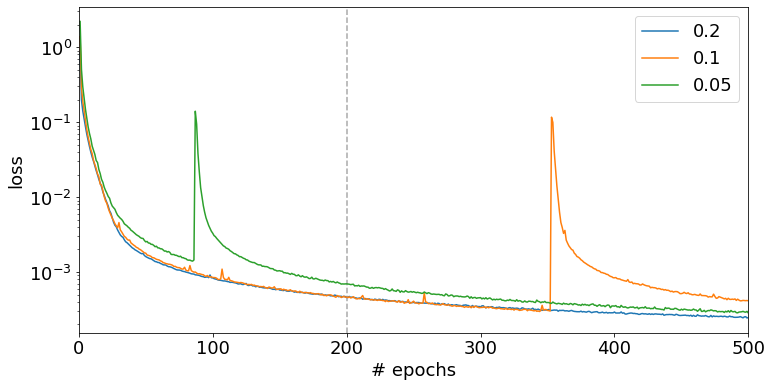

In [4]:
for t,t_data in data.items():
    print(t)
    fig, axs = plt.subplots(1,1,figsize=(12,6),squeeze=False)
    for c in t_data.keys():
        print('{:8s}: @200 {:1.5f}, @500 {:1.5f}'.format(c,t_data[c][1].data['loss'][199],t_data[c][1].data['loss'][499]))
        axs[0,0].plot(np.linspace(1,500,500),t_data[c][1].data['loss'],label=c.split('_')[-1])
    axs[0,0].semilogy()
    plt.axvline(x=200,c='darkgrey',ls='--',zorder=-1)
    axs[0,0].set_ylabel('loss')
    axs[0,0].set_xlabel('# epochs')
    axs[0,0].set_xlim(0,500)
    plt.legend()
    plt.show()

### Load the results from the different QN models

In [5]:
datatype = 'coadd'
pc_dr12_values = np.array([90,10,5])
prop_values = pc_dr12_values/100.
epochs = np.concatenate([np.linspace(1,10,10),np.linspace(20,100,9),np.linspace(200,500,4)]).astype(int)

## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True
common_specids = False

In [6]:
f_truth = variables.OUTDIR+'/data/truth/truth_dr12q.fits'
truth = read_truth([f_truth])

In [7]:
data = {}

for i,pc_dr12 in enumerate(pc_dr12_values):
    
    prop = prop_values[i]
    
    for epoch in epochs:
    
        ## Load the QN data.
        f_qn = variables.OUTDIR+'/outputs/qn_outputs/additional_setups/nepochs/{d}/prop_{p}/qnAll-train_{p}_{d}_0_0-epoch{e}-test_{d}.fits'.format(d=datatype,p=prop,e=str(epoch).zfill(3))    
        data['QN_{} {}'.format(pc_dr12,epoch)] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)


In [8]:
tid = data['QN_90 1']['OBJ_ID']
for i,pc_dr12 in enumerate(pc_dr12_values):
    w = np.in1d(data['QN_{} 1'.format(pc_dr12,1)]['OBJ_ID'],tid)
    print(w.sum())

50720
0
25321


### Find the set of common spectra, and reduce all data to that set
This finds which spectra* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each spectrum, and produces a single data table.

\* using spec_id = plate$\times$1000000000 + mjd$\times$10000 + fiber for BOSS, or spec_id = targetid for DESI (to be updated)

In [9]:
data_table = utils.reduce_data_to_table(data,truth,include_c_qn=include_c_qn,common_specids=common_specids)
data_table[:5]

SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_QN_90 1,CLASS_QN_90 1,ISQSO_QN_90 1,C_QN_90 1 [6],Z_LINES_QN_90 1 [6],Z_QN_90 2,CLASS_QN_90 2,ISQSO_QN_90 2,C_QN_90 2 [6],Z_LINES_QN_90 2 [6],Z_QN_90 3,CLASS_QN_90 3,ISQSO_QN_90 3,C_QN_90 3 [6],Z_LINES_QN_90 3 [6],Z_QN_90 4,CLASS_QN_90 4,ISQSO_QN_90 4,C_QN_90 4 [6],Z_LINES_QN_90 4 [6],Z_QN_90 5,CLASS_QN_90 5,ISQSO_QN_90 5,C_QN_90 5 [6],Z_LINES_QN_90 5 [6],Z_QN_90 6,CLASS_QN_90 6,ISQSO_QN_90 6,C_QN_90 6 [6],Z_LINES_QN_90 6 [6],Z_QN_90 7,CLASS_QN_90 7,ISQSO_QN_90 7,C_QN_90 7 [6],Z_LINES_QN_90 7 [6],Z_QN_90 8,CLASS_QN_90 8,ISQSO_QN_90 8,C_QN_90 8 [6],Z_LINES_QN_90 8 [6],Z_QN_90 9,CLASS_QN_90 9,ISQSO_QN_90 9,C_QN_90 9 [6],Z_LINES_QN_90 9 [6],Z_QN_90 10,CLASS_QN_90 10,ISQSO_QN_90 10,C_QN_90 10 [6],Z_LINES_QN_90 10 [6],Z_QN_90 20,CLASS_QN_90 20,ISQSO_QN_90 20,C_QN_90 20 [6],Z_LINES_QN_90 20 [6],Z_QN_90 30,CLASS_QN_90 30,ISQSO_QN_90 30,C_QN_90 30 [6],Z_LINES_QN_90 30 [6],Z_QN_90 40,CLASS_QN_90 40,ISQSO_QN_90 40,C_QN_90 40 [6],Z_LINES_QN_90 40 [6],Z_QN_90 50,CLASS_QN_90 50,ISQSO_QN_90 50,C_QN_90 50 [6],Z_LINES_QN_90 50 [6],Z_QN_90 60,CLASS_QN_90 60,ISQSO_QN_90 60,C_QN_90 60 [6],Z_LINES_QN_90 60 [6],Z_QN_90 70,CLASS_QN_90 70,ISQSO_QN_90 70,C_QN_90 70 [6],Z_LINES_QN_90 70 [6],Z_QN_90 80,CLASS_QN_90 80,ISQSO_QN_90 80,C_QN_90 80 [6],Z_LINES_QN_90 80 [6],Z_QN_90 90,CLASS_QN_90 90,ISQSO_QN_90 90,C_QN_90 90 [6],Z_LINES_QN_90 90 [6],Z_QN_90 100,CLASS_QN_90 100,ISQSO_QN_90 100,C_QN_90 100 [6],Z_LINES_QN_90 100 [6],Z_QN_90 200,CLASS_QN_90 200,ISQSO_QN_90 200,C_QN_90 200 [6],Z_LINES_QN_90 200 [6],Z_QN_90 300,CLASS_QN_90 300,ISQSO_QN_90 300,C_QN_90 300 [6],Z_LINES_QN_90 300 [6],Z_QN_90 400,CLASS_QN_90 400,ISQSO_QN_90 400,C_QN_90 400 [6],Z_LINES_QN_90 400 [6],Z_QN_90 500,CLASS_QN_90 500,ISQSO_QN_90 500,C_QN_90 500 [6],Z_LINES_QN_90 500 [6],Z_QN_10 1,CLASS_QN_10 1,ISQSO_QN_10 1,C_QN_10 1 [6],Z_LINES_QN_10 1 [6],Z_QN_10 2,CLASS_QN_10 2,ISQSO_QN_10 2,C_QN_10 2 [6],Z_LINES_QN_10 2 [6],Z_QN_10 3,CLASS_QN_10 3,ISQSO_QN_10 3,C_QN_10 3 [6],Z_LINES_QN_10 3 [6],Z_QN_10 4,CLASS_QN_10 4,ISQSO_QN_10 4,C_QN_10 4 [6],Z_LINES_QN_10 4 [6],Z_QN_10 5,CLASS_QN_10 5,ISQSO_QN_10 5,C_QN_10 5 [6],Z_LINES_QN_10 5 [6],Z_QN_10 6,CLASS_QN_10 6,ISQSO_QN_10 6,C_QN_10 6 [6],Z_LINES_QN_10 6 [6],Z_QN_10 7,CLASS_QN_10 7,ISQSO_QN_10 7,C_QN_10 7 [6],Z_LINES_QN_10 7 [6],Z_QN_10 8,CLASS_QN_10 8,ISQSO_QN_10 8,C_QN_10 8 [6],Z_LINES_QN_10 8 [6],Z_QN_10 9,CLASS_QN_10 9,ISQSO_QN_10 9,C_QN_10 9 [6],Z_LINES_QN_10 9 [6],Z_QN_10 10,CLASS_QN_10 10,ISQSO_QN_10 10,C_QN_10 10 [6],Z_LINES_QN_10 10 [6],Z_QN_10 20,CLASS_QN_10 20,ISQSO_QN_10 20,C_QN_10 20 [6],Z_LINES_QN_10 20 [6],Z_QN_10 30,CLASS_QN_10 30,ISQSO_QN_10 30,C_QN_10 30 [6],Z_LINES_QN_10 30 [6],Z_QN_10 40,CLASS_QN_10 40,ISQSO_QN_10 40,C_QN_10 40 [6],Z_LINES_QN_10 40 [6],Z_QN_10 50,CLASS_QN_10 50,ISQSO_QN_10 50,C_QN_10 50 [6],Z_LINES_QN_10 50 [6],Z_QN_10 60,CLASS_QN_10 60,ISQSO_QN_10 60,C_QN_10 60 [6],Z_LINES_QN_10 60 [6],Z_QN_10 70,CLASS_QN_10 70,ISQSO_QN_10 70,C_QN_10 70 [6],Z_LINES_QN_10 70 [6],Z_QN_10 80,CLASS_QN_10 80,ISQSO_QN_10 80,C_QN_10 80 [6],Z_LINES_QN_10 80 [6],Z_QN_10 90,CLASS_QN_10 90,ISQSO_QN_10 90,C_QN_10 90 [6],Z_LINES_QN_10 90 [6],Z_QN_10 100,CLASS_QN_10 100,ISQSO_QN_10 100,C_QN_10 100 [6],Z_LINES_QN_10 100 [6],Z_QN_10 200,CLASS_QN_10 200,ISQSO_QN_10 200,C_QN_10 200 [6],Z_LINES_QN_10 200 [6],Z_QN_10 300,CLASS_QN_10 300,ISQSO_QN_10 300,C_QN_10 300 [6],Z_LINES_QN_10 300 [6],Z_QN_10 400,CLASS_QN_10 400,ISQSO_QN_10 400,C_QN_10 400 [6],Z_LINES_QN_10 400 [6],Z_QN_10 500,CLASS_QN_10 500,ISQSO_QN_10 500,C_QN_10 500 [6],Z_LINES_QN_10 500 [6],Z_QN_5 1,CLASS_QN_5 1,ISQSO_QN_5 1,C_QN_5 1 [6],Z_LINES_QN_5 1 [6],Z_QN_5 2,CLASS_QN_5 2,ISQSO_QN_5 2,C_QN_5 2 [6],Z_LINES_QN_5 2 [6],Z_QN_5 3,CLASS_QN_5 3,ISQSO_QN_5 3,C_QN_5 3 [6],Z_LINES_QN_5 3 [6],Z_QN_5 4,CLASS_QN_5 4,ISQSO_QN_5 4,C_QN_5 4 [6],Z_LINES_QN_5 4 [6],Z_QN_5 5,CLASS_QN_5 5,ISQSO_QN_5 5,C_QN_5 5 [6],Z_LINES_QN_5 5 [6],Z_QN_5 6,CLASS_QN_5 6,ISQSO_QN_5 6,C_QN_5 6 [6],Z_LINES_QN_5 6 [6],Z_QN_5 7,CLASS_QN_5 7,ISQSO_QN_5 7,C_QN_5 7 [

In [10]:
# Include only objects in the data table that have the highest confidence level, and VI redshift not equal to -1.
w = (data_table['ZCONF_PERSON']==2) & (data_table['Z_VI']>-1)
data_table = data_table[w]
len(data_table)

569744

### Compare the performance of the different model/data combos.
xxx

In [11]:
ls = {'QN_90': '-',
      'QN_10': '--',
      'QN_5': ':',
     }

training_set_sizes = {0.9: 563000, 0.8: 500000, 0.5: 313000, 0.2: 125000, 0.1: 63000, 0.05: 31000, 0.025: 116000, 0.01: 6000}

In [12]:
## Define general parameter values.
dv_max = 6000.

# confidence thresholds.
c_th = 0.5
n_detect = 1

In [13]:
## Define strategies.
strategies = {}

for s in data.keys():
    
    nepochs = int(s.split(' ')[-1])
    name = r'$n_{{epochs}}={}$'.format(nepochs)
    if type(data_table['ISQSO_{}'.format(s)])==astropy.table.column.MaskedColumn:
        filt = (~data_table['ISQSO_{}'.format(s)].data.mask)
    else:
        filt = np.ones(len(data_table)).astype(bool)
    temp_data_table = data_table[filt]
    
    # QN definitions.
    n_detect = 1
    strat = strategy.Strategy('qn',cf_kwargs={'qn_name':s})
    strategies[s] = {'prediction': strat.predict(temp_data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect}),
                     'n': name}

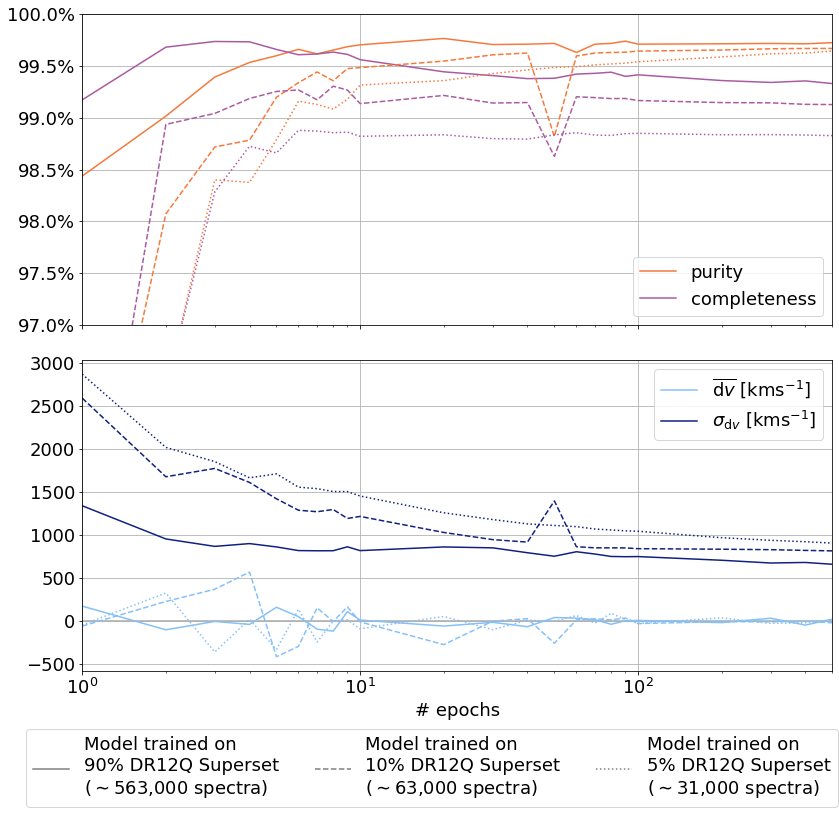

In [14]:
import matplotlib.ticker as mtick
nydec = 1

filename = '../plots/qn_performance_vs_nepochs_linear.pdf'
fig, axs = plt.subplots(2,1,figsize=figsize,squeeze=False,sharex=True)

for i,pc_dr12 in enumerate(pc_dr12_values):
    pur = []
    com = []
    dv_mean = []
    dv_std = []
    for epoch in epochs:
        pred = strategies['QN_{} {}'.format(pc_dr12,epoch)]['prediction']
        p,c = pred.calculate_pur_com(dv_max=dv_max)
        pur += [p]
        com += [c]
        dv = pred.calculate_dv(use_abs=False)
        w = abs(dv)<6000.
        dv_mean += [np.mean(dv[w])]
        dv_std += [np.std(dv[w])]

    if i==0:
        plabel='purity'
        clabel='completeness'
        mdvlabel=r'$\overline{\mathrm{d}v}~\mathrm{[kms^{-1}]}$'
        sdvlabel=r'$\sigma_{\mathrm{d}v}~\mathrm{[kms^{-1}]}$'
    else:
        plabel=clabel=mdvlabel=sdvlabel=None
        
    axs[0,0].plot(epochs,pur,color=utils.colours['C0'],ls=ls['QN_{}'.format(pc_dr12)])
    axs[0,0].plot(epochs,com,color=utils.colours['C1'],ls=ls['QN_{}'.format(pc_dr12)])
    axs[1,0].plot(epochs,dv_mean,color=utils.colours['C2'],ls=ls['QN_{}'.format(pc_dr12)])
    axs[1,0].plot(epochs,dv_std,color=utils.colours['C3'],ls=ls['QN_{}'.format(pc_dr12)])

axs[0,0].set_ylim(0.97,1.0)
artists = []
artists += [axs[0,0].plot([0],[0],color=utils.colours['C0'])[0]]
artists += [axs[0,0].plot([0],[0],color=utils.colours['C1'])[0]]
labels = ['purity','completeness']
axs[0,0].legend(artists,labels)
axs[0,0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=nydec))

axs[1,0].axhline(y=0,c='darkgrey',zorder=-1)
artists = []
artists += [axs[1,0].plot([],[],color=utils.colours['C2'])[0]]
artists += [axs[1,0].plot([],[],color=utils.colours['C3'])[0]]
labels = [r'$\overline{\mathrm{d}v}~\mathrm{[kms^{-1}]}$',r'$\sigma_{\mathrm{d}v}~\mathrm{[kms^{-1}]}$']
axs[1,0].legend(artists,labels)
axs[1,0].set_xlabel('# epochs')

artists = []
labels = []
for i,pc_dr12 in enumerate(pc_dr12_values):
    p = pc_dr12/100
    name = 'Model trained on\n{:.0%} DR12Q Superset\n'.format(p)
    name += r'($\sim${:,} spectra)'.format(training_set_sizes[p])
    ## Add objects to list of artists and labels for legend.
    artists += [axs[0,0].plot([0],[0],color='grey',ls=ls['QN_{}'.format(pc_dr12)])[0]]
    labels += [name]
fig.legend(artists,labels,loc='lower center',borderaxespad=0,bbox_to_anchor=(0.5,0.03),ncol=len(artists))
        
plt.semilogx()
for ax in axs.flatten():
    ax.set_xlim(1,500)
    ax.grid()

rect = (0,0.13,1.,1.)
plt.tight_layout(rect=rect)

plt.savefig(filename)
plt.show()